In [6]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

In [7]:
#load the dataset
iris= datasets.load_iris()
x= iris.data[:,:2]
y= iris.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [8]:
#svm with different kernel
def evaluate_on_test_data(model=None):
    predictions= model.predict(x_test)
    correct_predictions= 0
    for i in range(len(y_test)):
        if predictions[i]==y_test[i]:
            correct_predictions+=1
    accuracy= 100*correct_predictions/len(y_test)
    return accuracy


In [9]:
kernels= ('linear', 'poly', 'rbf', 'sigmoid')
accuracies=[]  #empty list
for index, kernel in enumerate(kernels):
    model= svm.SVC(kernel= kernel)
    model.fit(x_train, y_train)
    acc= evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy in kernel= {}".format(acc, kernel))

84.21052631578948 % accuracy in kernel= linear
76.3157894736842 % accuracy in kernel= poly
84.21052631578948 % accuracy in kernel= rbf
28.94736842105263 % accuracy in kernel= sigmoid


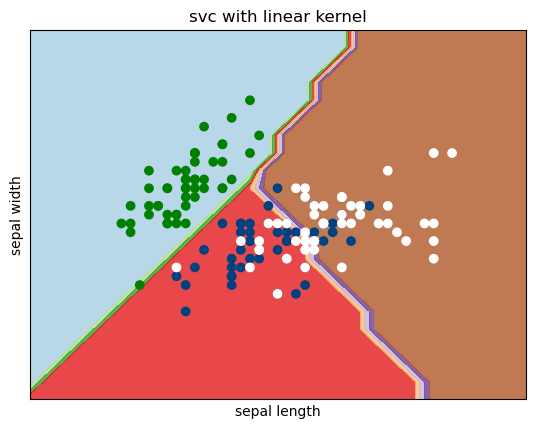

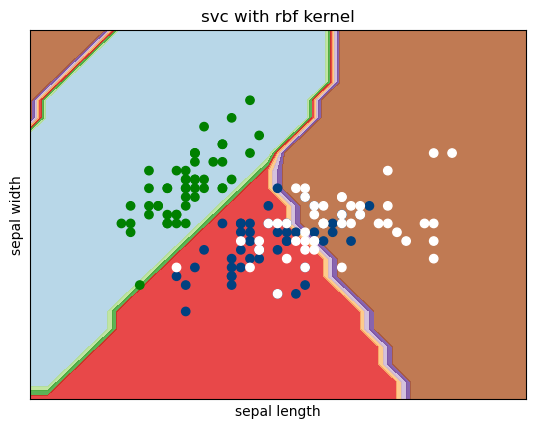

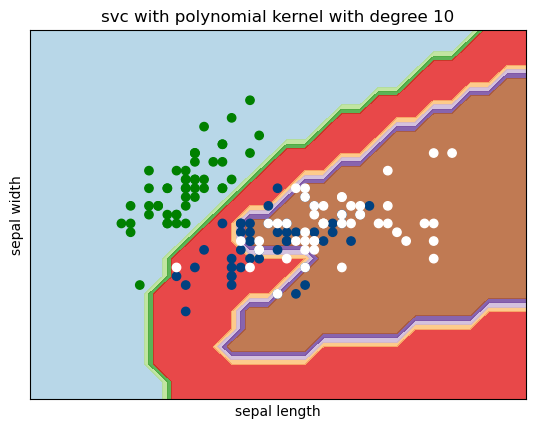

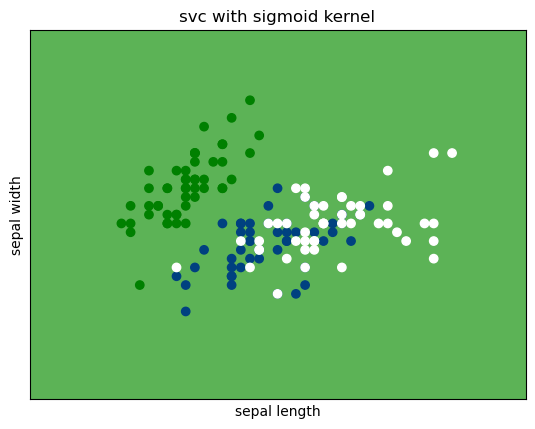

In [17]:
#visualize svm with decision boundary
#train svm with different kernels
svc= svm.SVC(kernel='linear').fit(x_train, y_train)
rbf_svc= svm.SVC(kernel= 'rbf', gamma= 0.7).fit(x_train, y_train)
poly_svc= svm.SVC(kernel= 'poly', degree= 10).fit(x_train, y_train)
sigmoid_svc= svm.SVC(kernel= 'sigmoid').fit(x_train, y_train)
#create a mesh to plot in
h= 0.2   #step size in mesh
x_min, x_max= x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max= x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy= np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))


# define title for plots
titles= ['svc with linear kernel', 'svc with rbf kernel', 'svc with polynomial kernel with degree 10', 'svc with sigmoid kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc, sigmoid_svc)):
    plt.figure(i)
    z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #put result into a color plot
    z= z.reshape(xx.shape)
    plt.contourf(xx, yy, z, cmap= plt.cm.Paired, alpha= 0.8)
    
    #plot training points
    plt.scatter(x[:, 0], x[:, 1], c= y, cmap= plt.cm.ocean)
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()   
